In [1]:
# загружаем библиотеки
import pandas as pd
import numpy as np
import scipy 

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#глубокое обучение
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation

from matplotlib import pyplot

%matplotlib inline

In [2]:
from google.colab import  files
uploaded = files.upload()


Saving DS_PVT_LOG_REGRESSION.xlsx to DS_PVT_LOG_REGRESSION.xlsx


In [3]:
df = pd.read_excel(open('DS_PVT_LOG_REGRESSION.xlsx', 'rb'))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PVT             841 non-null    int64  
 1   Local           841 non-null    int64  
 2   Ascites_simple  841 non-null    int64  
 3   EVL_simple      841 non-null    int64  
 4   PH_dur_simple   841 non-null    int64  
 5   HB_NORM         841 non-null    float64
 6   PLT_NORM        841 non-null    float64
 7   TB_NORM         841 non-null    float64
 8   PV_diam_NORM    841 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.3 KB


In [5]:
df.head()

,PVT,Local,Ascites_simple,EVL_simple,PH_dur_simple,HB_NORM,PLT_NORM,TB_NORM,PV_diam_NORM
0,1,0,0,0,1,0.542,0.226,0.045,0.329
1,1,0,1,0,0,0.569,0.289,0.098,0.419
2,1,1,1,0,0,0.406,0.063,0.039,0.452
3,1,0,1,0,0,0.656,0.196,0.190,0.161
4,1,0,1,0,0,0.649,0.089,0.033,0.303


In [6]:
df['PVT'].value_counts()

0    708
1    133
Name: PVT, dtype: int64

In [ ]:
# df = df.drop('ID_Number', axis = 1) # удаляем столбец с идентификационными данными

In [7]:
X = df.drop('PVT', axis=1).copy() # X - предикторы PVT
X.head() # смотрим первые 5 строк: целевая переменная PVT отсутствует

,Local,Ascites_simple,EVL_simple,PH_dur_simple,HB_NORM,PLT_NORM,TB_NORM,PV_diam_NORM
0,0,0,0,1,0.542,0.226,0.045,0.329
1,0,1,0,0,0.569,0.289,0.098,0.419
2,1,1,0,0,0.406,0.063,0.039,0.452
3,0,1,0,0,0.656,0.196,0.190,0.161
4,0,1,0,0,0.649,0.089,0.033,0.303


In [8]:
# y (строчная букава) - целевая переменная (классификационная)
# создаем копию столбца, в котором содержится целевая переменная
y = df['PVT'].copy().values
y = np.stack((y == 0, y), axis=1)
y[:10]

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [9]:
# разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, shuffle = True, random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(588, 8)
(253, 8)
(588, 2)
(253, 2)


In [11]:
n_features = X.shape[1]

# Строим нейронную сеть на исходных данных: разбалансированный датасет

In [12]:
from sklearn.utils import validation
import tensorflow as tf

def scheduler(epoch, lr):
  if epoch < 30:
    return lr
  else:
    return lr * 0.95  # чтобы уменьшить переобучение уменьшаем lr

model = Sequential()
model.add(Dense(n_features * 2, input_shape = (n_features,) ))
model.add(BatchNormalization())
model.add(Activation('tanh'))

model.add(Dropout(0.5))
model.add(Dense(n_features * 2))
model.add(BatchNormalization())
model.add(Activation('tanh'))

model.add(Dropout(0.5))
model.add(Dense(n_features * 2))
model.add(BatchNormalization())
model.add(Activation('tanh'))

model.add(Dense(2, activation = 'softmax'))
optimizer = optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy')
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(X_train, y_train,
                    epochs = 50,
                    batch_size = 32,
                    verbose = 1,
                    validation_data = (X_test, y_test),
                    callbacks=[callback])

Epoch 1/50
19/19 [==============================] - 2s 15ms/step - loss: 0.6610 - val_loss: 0.6436 - lr: 0.0050
Epoch 2/50
19/19 [==============================] - 0s 4ms/step - loss: 0.5562 - val_loss: 0.5435 - lr: 0.0050
Epoch 3/50
19/19 [==============================] - 0s 4ms/step - loss: 0.4588 - val_loss: 0.4417 - lr: 0.0050
Epoch 4/50
19/19 [==============================] - 0s 5ms/step - loss: 0.4010 - val_loss: 0.3772 - lr: 0.0050
Epoch 5/50
19/19 [==============================] - 0s 7ms/step - loss: 0.3642 - val_loss: 0.3583 - lr: 0.0050
Epoch 6/50
19/19 [==============================] - 0s 7ms/step - loss: 0.3493 - val_loss: 0.3524 - lr: 0.0050
Epoch 7/50
19/19 [==============================] - 0s 9ms/step - loss: 0.3470 - val_loss: 0.3385 - lr: 0.0050
Epoch 8/50
19/19 [==============================] - 0s 9ms/step - loss: 0.3398 - val_loss: 0.3377 - lr: 0.0050
Epoch 9/50
19/19 [==============================] - 0s 13ms/step - loss: 0.3581 - val_loss: 0.3454 - lr: 0.0050

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                        

In [14]:
from sklearn.metrics import roc_auc_score

ROC AUC:  0.831527871812232


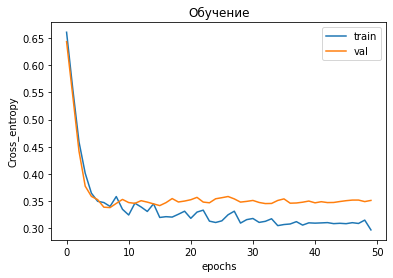

In [16]:
#визуализируем процесс обучения
#predict test_set

#Валидируем наш прогноз
score = roc_auc_score(y_test[:, 1], model.predict(X_test)[:, 1])

print('ROC AUC: ', score)

#визуализация процесса обучения
pyplot.title('Обучение')
pyplot.xlabel('epochs')
pyplot.ylabel('Cross_entropy')
pyplot.plot(history.history['loss'], label = 'train')
pyplot.plot(history.history['val_loss'], label = 'val')
pyplot.legend()
pyplot.show()

# Балансируем датасет методом SMOTE

In [17]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [19]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train[:, 1])
y_train_smote = np.stack((y_train_smote == 0, y_train_smote), axis=1)

In [20]:
print(X_train_smote.shape)
print(X_test.shape)
print(y_train_smote.shape)
print(y_test.shape)

(994, 8)
(253, 8)
(994, 2)
(253, 2)


In [21]:
from collections import Counter
print("Число объектов в обучающей выборке по исходу PVT до применения SMOTE :" , Counter(y_train[:, 1]))
print("Число объектов в обучающей выборке по исходу PVT до применения SMOTE :" , Counter(y_train_smote[:, 1]))

Число объектов в обучающей выборке по исходу PVT до применения SMOTE : Counter({0: 497, 1: 91})
Число объектов в обучающей выборке по исходу PVT до применения SMOTE : Counter({0: 497, 1: 497})


In [22]:
n_features = X_train_smote.shape[1]

In [23]:
model_smote = Sequential()
model_smote.add(Dense(2 * n_features, input_shape = (n_features,) ))
model_smote.add(BatchNormalization())
model_smote.add(Activation('tanh'))

model_smote.add(Dropout(0.5))
model_smote.add(Dense(2 * n_features))
model_smote.add(BatchNormalization())
model_smote.add(Activation('tanh'))

model_smote.add(Dropout(0.5))
model_smote.add(Dense(2 * n_features))
model_smote.add(BatchNormalization())
model_smote.add(Activation('tanh'))

model_smote.add(Dropout(0.5))
model_smote.add(Dense(2 * n_features))
model_smote.add(BatchNormalization())
model_smote.add(Activation('tanh'))

model_smote.add(Dropout(0.5))

model_smote.add(Dense(2, activation = 'softmax'))

optimizer = optimizers.Adam(learning_rate=0.001)
model_smote.compile(optimizer = optimizer, loss = 'binary_crossentropy')
history = model_smote.fit(X_train_smote, y_train_smote,
                    epochs = 150,
                    batch_size = 32,
                    verbose = 1,
                    validation_data = (X_test, y_test))

Epoch 1/150
32/32 [==============================] - 5s 31ms/step - loss: 0.7940 - val_loss: 0.7528
Epoch 2/150
32/32 [==============================] - 0s 9ms/step - loss: 0.7572 - val_loss: 0.7321
Epoch 3/150
32/32 [==============================] - 0s 6ms/step - loss: 0.7366 - val_loss: 0.7129
Epoch 4/150
32/32 [==============================] - 0s 9ms/step - loss: 0.7225 - val_loss: 0.7035
Epoch 5/150
32/32 [==============================] - 0s 8ms/step - loss: 0.7018 - val_loss: 0.6840
Epoch 6/150
32/32 [==============================] - 0s 7ms/step - loss: 0.6916 - val_loss: 0.6699
Epoch 7/150
32/32 [==============================] - 0s 6ms/step - loss: 0.6735 - val_loss: 0.6557
Epoch 8/150
32/32 [==============================] - 0s 7ms/step - loss: 0.6679 - val_loss: 0.6423
Epoch 9/150
32/32 [==============================] - 0s 6ms/step - loss: 0.6601 - val_loss: 0.6476
Epoch 10/150
32/32 [==============================] - 0s 6ms/step - loss: 0.6539 - val_loss: 0.6458
Epoch 11

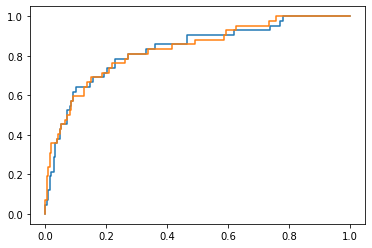

In [24]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test[:, 1], model.predict(X_test)[:, 1])
fpr_smote, tpr_smote, thresholds = roc_curve(y_test[:, 1], model_smote.predict(X_test)[:, 1])
pyplot.plot(fpr, tpr)
pyplot.plot(fpr_smote, tpr_smote, label="smote")

In [25]:
print('ROC AUC: ', score)

ROC AUC:  0.831527871812232


In [ ]:
model.count_params()

914

ROC AUC:  0.831527871812232


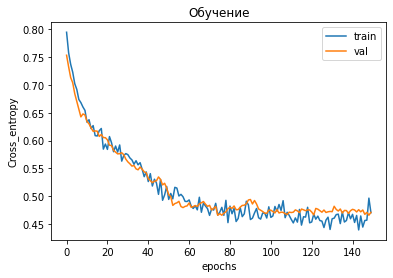

In [26]:
#визуализируем процесс обучения
#predict test_set

#Валидируем наш прогноз
score = roc_auc_score(y_test[:, 1], model.predict(X_test)[:, 1])

print('ROC AUC: ', score)

#визуализация процесса обучения
pyplot.title('Обучение')
pyplot.xlabel('epochs')
pyplot.ylabel('Cross_entropy')
pyplot.plot(history.history['loss'], label = 'train')
pyplot.plot(history.history['val_loss'], label = 'val')
pyplot.legend()
pyplot.show()


# Визуализируем модель

In [29]:
from tensorflow.keras.utils import plot_model

In [44]:
# plot_model(model, to_file='PVT_model.png', show_shapes = False)

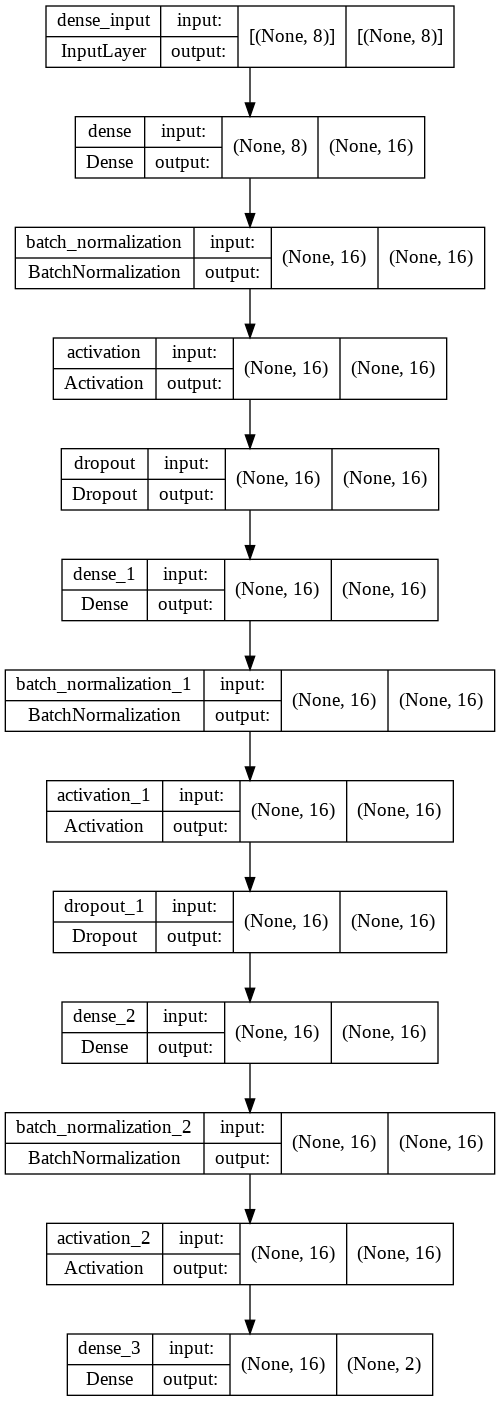

In [45]:
plot_model(model, to_file='PVT_model.png', show_shapes = True)